
### Visualizing Changes in Glacial Extent of Hifsjokull Icecap in Iceland between 2016 and 2020 Using Landsat 8 Imagery  
  
  ##### By Elena Chambers

#### Introduction 

As human contributions to global climate change becomes more prominent even in our daily lives, increased greenhouse gas emissions have resulted in major changes in the glaciated regions on the planet. Even minute chemical changes in the atmosphere can result in regional changes in both temperature and precipitation and are key factors in determining the mass balance in glaciers (Jóhannesson, 1997).  While glacial advance and retreat cycles occur naturally, the present retreat rate of glaciers in Iceland is faster than can be explained by natural processes alone. The premise of this project is to classify the glacial extent of the Hifsjokull glacier in central Iceland.  
 <br>
 <br>
  ##### Study Area

The Hifsjokull glacier (outlined in the follium map below) is the third largest glacier in Iceland and is located atop a dormant volcano. While geothermal heat flux derived from subglacial volcanos can result in non-negligible contributions to glacial retreat, geothermal heat flux beneath Hifsjokull glacier has little implications on increasing glacial retreat rates within the past 20 years (Jóhannesson, et. al, 2020). As such, the Hifsjokull icecap is an ideal glacier for the purposes of this project in reference to invesitgating the implications of climate change on glacial extent. 
<br>
<br>
##### Data Collection
Two 185 km x 180 km Landsat 8 scene tiles were downloaded from the USGS Earth Explorer portal. Search criteria were restricted between June and August months to minimize fresh snow cover over the glacier and covered the full extent of Hifsjokull glacier in central Iceland.   
The first image is a tile from the summer of 2016 (collected 8/24/2016): WRS path 219, row 15, 23.44% total cloud cover, 22.10% cloud cover over land features, and in the UTM WSG84 Zone 27 projection. The second image is a Landsat 8 image from the summer of 2020 (collected 7/2/2020), WRS path 219, row 15, 8.50% total cloud cover, 5.95% cloud cover over land features. These tiles include the Myrdalsjokull, Langjokull, and Eyjafjallajokull glaciers in the southwest portion of Iceland.  
<br>

The 6 bands and mask file I created can be downloaded from this link:
<https://drive.google.com/file/d/14JbB1EZtGKB7OyZrCG2k5p6tTiyiY4zB/view?usp=sharing>
<br>
<br>
*The full 2016 dataset can be downloaded at: <https://earthexplorer.usgs.gov/scene/metadata/full/5e83d14f2fc39685/LC82190152016237LGN01/> 
<br>
2020 dataset can be downloaded at: <https://earthexplorer.usgs.gov/scene/metadata/full/5e83d14f2fc39685/LC82190152020184LGN00/>*
<br>


In [1]:
import rasterio 
from rasterio import plot
import rasterio.mask
from rasterio.plot import show

%matplotlib inline
import matplotlib.pyplot as plt

import geopandas as gpd
import folium
import fiona
import numpy as np


In order to perform multispectral analysis, individual bands must be concatenated into larger (and multidimensional) arrays. The caveat, the size of the array produced by combining multiple bands exceeds the computational limits of the Jupyter kernel when trying to produce an image. To overcome this issue, a polygon feature was constructed around the location of interest (Hifsjokull) using latitude/longitude coordinates in ArcGIS Pro (I attempted to create a GeoJSON polygon that would function as a mask, but it became too unruly). The polygon was then used to mask and clip all array values outside of the area of interest and drastically reduced the computational load. 
<br>  
Here, I have imported the mask into Jupter. The extent of the mask is shown in the following interactive map. 

In [ ]:
crop_extent = gpd.read_file("mask.shp")
crop_extent.set_crs(epsg=32627, inplace=True)

In [3]:
#Plot bounds of crop_extent polygon in follium map
m = folium.Map([64.708511, -19.342660], zoom_start=6, tiles='cartodbpositron')
folium.GeoJson(crop_extent).add_to(m)
folium.LatLngPopup().add_to(m)
m


Each spectral band is stored in individual files. In this project I focused on the red, green, and blue bands (band 4, 3, and 2, respectivley). In total, I used 6 bands (3 from the 2016 dataset, and 3 from the 2020 dataset).

In this next code block, I have created a function that will clip the area of interest from the larger Landsat 8 datasets. 
  
  

In [4]:
#Define the polygon with spatial extent
with fiona.open("mask.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]


#Function that will use the mask polygon to crop the bands
def crop_image (file):
    with rasterio.open(file) as src:
        out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
        out_meta = src.meta
        #Update metadata to have correct dimensions as the crop_extent
        out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform}) 
        return out_image, out_meta
  
#label each cropped band
    
b4crop_2016= crop_image('LC08_L1TP_219015_20200702_20200913_02_T1_B4.TIF');
b3crop_2016= crop_image('LC08_L1TP_219015_20200702_20200913_02_T1_B3.TIF');
b2crop_2016= crop_image('LC08_L1TP_219015_20200702_20200913_02_T1_B2.TIF');

b4crop_2020= crop_image('LC08_L2SP_219015_20160824_20200906_02_T1_SR_B4.TIF');
b3crop_2020= crop_image('LC08_L2SP_219015_20160824_20200906_02_T1_SR_B3.TIF');
b2crop_2020= crop_image('LC08_L2SP_219015_20160824_20200906_02_T1_SR_B2.TIF');



  
    
    
The 2 figures below are visualizations of each indivual band. The 3 plots on top are the 2016 red, green, and blue bands. The 3 plots on the bottom are from the 2020 image.  
 <br> 
Areas with the highest intensity/values are highly saturated. Glacial/snowy areas have high very high surface reflectance in these bands.
    
    

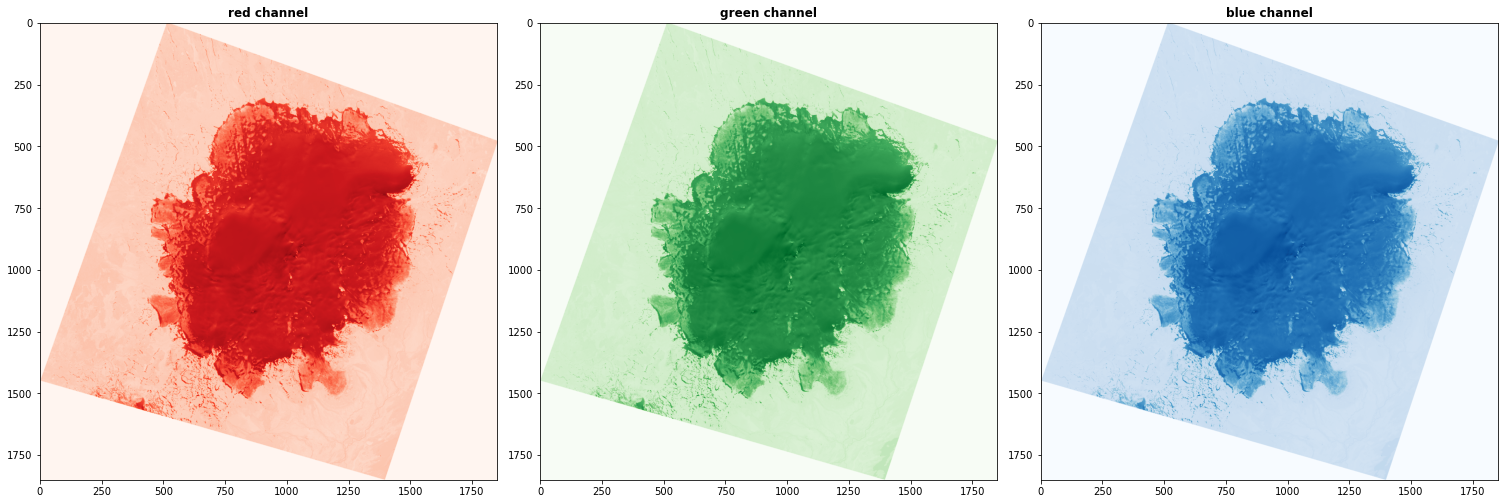

In [4]:
#Plot individual bands by calling this function I made
def rgb_seperate_bands (redarray, greenarray, bluearray):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))
    plot.show(redarray, ax=ax1, cmap='Reds', title='red channel') #red
    plot.show(greenarray, ax=ax2, cmap='Greens', title='green channel') #green
    plot.show(bluearray, ax=ax3, cmap='Blues', title='blue channel') # blue
    fig.tight_layout()

rgb_seperate_bands(b4crop_2016[0],b3crop_2016[0],b2crop_2016[0])

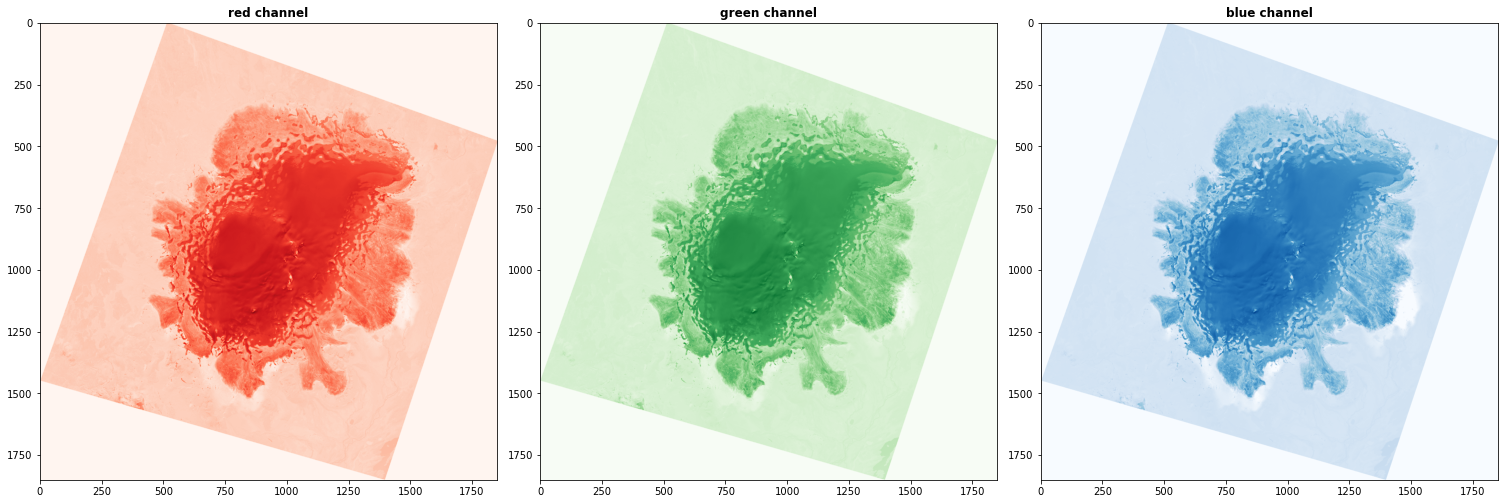

In [8]:
rgb_seperate_bands(b4crop_2020[0],b3crop_2020[0],b2crop_2020[0])

<br>
<br>
<br>
In order to use the classifier functions within the SciKit-Learn package, each spectral band was normalized such that all values were within 0.0-1.0 scale for image display. After the bands were normalized, the red, green, and blue bands were combined into one array so that we can see a natual RGB color composite image.

In [5]:

#function to normalize bands
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Call function & Normalize the bands
redn16 = normalize(b4crop_2016[0])
greenn16 = normalize(b3crop_2016[0])
bluen16 = normalize(b2crop_2016[0])

redn20 = normalize(b4crop_2020[0])
greenn20 = normalize(b3crop_2020[0])
bluen20 = normalize(b2crop_2020[0])

#Verify bands are looking normal and are in the 0.0-1.0 range
print("Normalized bands for 2016")
print(redn16.min(), '-', redn16.max(), 'mean:', redn16.mean())
print(greenn16.min(), '-', greenn16.max(), 'mean:', greenn16.mean())
print(bluen16.min(), '-', bluen16.max(), 'mean:', bluen16.mean())

print("Normalized bands for 2020")
print(redn20.min(), '-', redn20.max(), 'mean:', redn20.mean())
print(greenn20.min(), '-', greenn20.max(), 'mean:', greenn20.mean())
print(bluen20.min(), '-', bluen20.max(), 'mean:', bluen20.mean())

Normalized bands for 2016
0.0 - 1.0 mean: 0.2557859100018336
0.0 - 1.0 mean: 0.2593036727206099
0.0 - 1.0 mean: 0.26797769186123777
Normalized bands for 2020
0.0 - 1.0 mean: 0.20429308349007513
0.0 - 1.0 mean: 0.20661087470656897
0.0 - 1.0 mean: 0.20580913877996046


In [4]:
#Create 3D RBG array 
rgb16 = np.vstack((redn16, greenn16, bluen16))
rgb20 = np.vstack((redn20, greenn20, bluen20))

<br>
At this point, the kernal was overloaded with data and would crash. To create a "save" point, I exported the RGB arrays as .tif files. 
<br> 
<br> 
The "RGB16.tif" and "RGB20.tif" files contain all the processed data and are ready to be classified.

In [ ]:
#Using scikit image to minimize lossy exports
from skimage.io import imsave, imread
imsave("RGB16.tif", rgb16)

In [ ]:
from skimage.io import imsave, imread
imsave("RGB20.tif", rgb20)

<br> 

With the newly created .tif files, RGB visualizations are plotted below.

/opt/conda/lib/python3.8/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


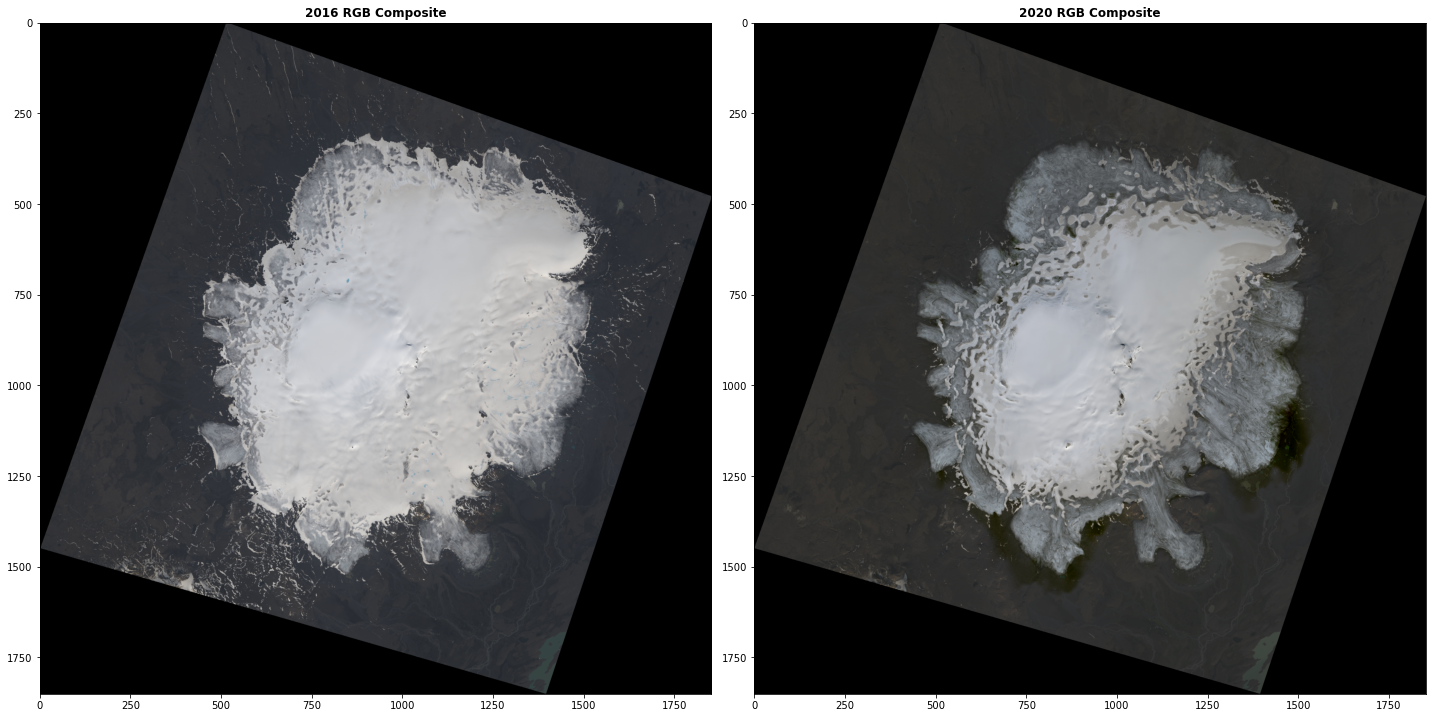

In [5]:
#Plot RGB images 
rgb16 = rasterio.open('RGB16.tif')
rgb20 = rasterio.open('RGB20.tif')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plot.show(rgb16, ax=ax1, title='2016 RGB Composite') 
plot.show(rgb20, ax=ax2, title='2020 RGB Composite') 

fig.tight_layout()
#I lost the spatial referece, not sure how that happened, but its okay for now

#### Classifier
Considering the focus of the project was to classify glacial extent, the simple and effective K-means unsupervised classification technique was utilized. It was not necessary to perfectly classify waterbodies, vegetation, or anything other than snow and ice which have very strong spectral characteristics. 
<br>
The K-means algorithm is included within the Scikit-Learn package and works by separating data points into a defined number of groups “k”. In order to execute this algorithm, the number of clusters must be first be defined. To identify the ideal number of clusters, the k-means algorithm was performed using 3 clusters, 5 cluster, and 10 clusters on the RBG composite images. The resulting classifications were compared, and the algorithm performed the best when using 5 clusters.

*side note*: I attempted to create a function (below), and it worked. However to create a series of plots for comparison, I had trouble being able to plot. I opted for the cut&paste method which I know is not ideal.


`rast = rasterio.open('RGB16.tif')`



`def k_means ( red, green, blue, numberofclusters):  
         original_shape = red.shape
         samples = np.column_stack([red.flatten(), green.flatten(),  blue.flatten()])`  
         
`
    clf = sklearn.cluster.KMeans(n_clusters=numberofclusters) 
    labels = clf.fit_predict(samples).reshape(original_shape) 
    plt.imshow(labels) 
    plt.show() 
    return labels`

Which can be called as;  
`k_means((rast.read(1)), (rast.read(2)),(rast.read(3)), 3)`



In [3]:
#reopen RGB tif, assign variables for each band
rast16 = rasterio.open('RGB16.tif')
red16 = (rast16.read(1))
green16 = (rast16.read(2))
blue16 = (rast16.read(3))

import sklearn.cluster

#Apply K-means cluster algorithm (it is slow)
original_shape = red16.shape
samples = np.column_stack([red16.flatten(), green16.flatten(), blue16.flatten()])

#K-means using 5 clusters
clf5 = sklearn.cluster.KMeans(n_clusters=5)
labels5 = clf5.fit_predict(samples).reshape(original_shape)

#K-means using 3 clusters
clf3 = sklearn.cluster.KMeans(n_clusters=3)
labels3 = clf3.fit_predict(samples).reshape(original_shape)

#K-means using 10 clusters
clf10 = sklearn.cluster.KMeans(n_clusters=10)
labels10 = clf10.fit_predict(samples).reshape(original_shape)

/opt/conda/lib/python3.8/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


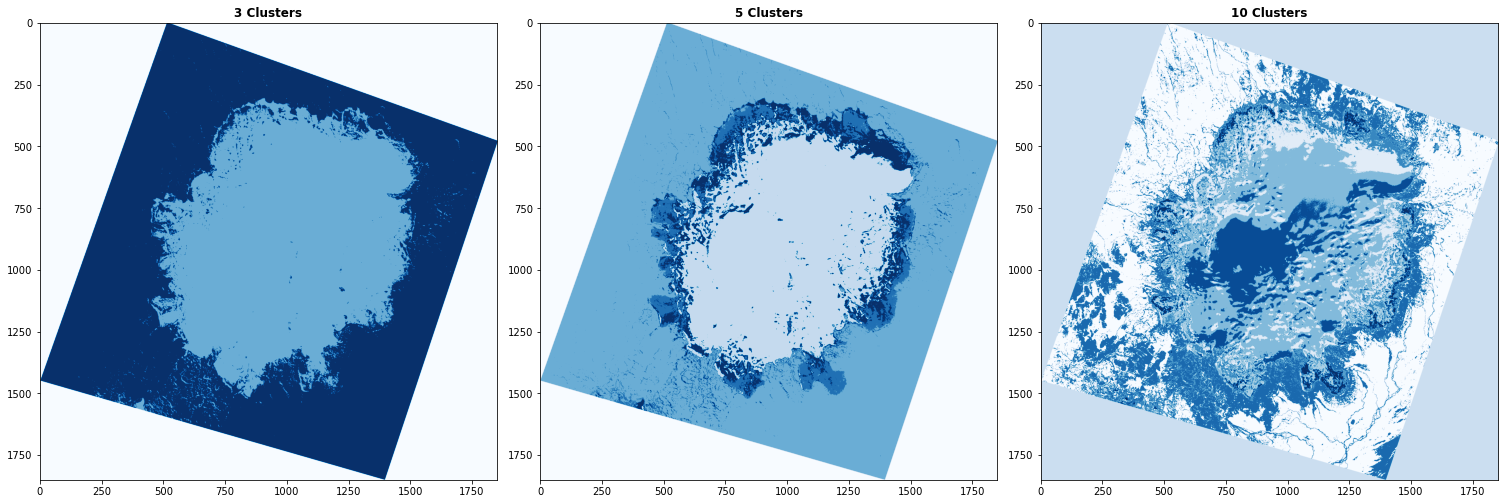

In [4]:
#Plot the 3, 5, 10 clusters 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))
plot.show(labels3, ax=ax1, cmap='Blues', title='3 Clusters') #red
plot.show(labels5, ax=ax2, cmap='Blues', title='5 Clusters') #green
plot.show(labels10, ax=ax3, cmap='Blues', title='10 Clusters') # blue
fig.tight_layout()

Above: the 2016 scene was classified using the k-means algorithm in Scikit-Learn. Glacial extent was underrepresented using only 3 clusters, are well represented using 5 clusters, and overclassified using 10 clusters.   
<br>  

In [3]:
#Same procedure as block above, comments are the same
rast20 = rasterio.open('RGB20.tif')
red20 = (rast20.read(1))
green20 = (rast20.read(2))
blue20 = (rast20.read(3))

import sklearn.cluster

original_shape = red20.shape
samples = np.column_stack([red20.flatten(), green20.flatten(), blue20.flatten()])

clf5_20 = sklearn.cluster.KMeans(n_clusters=5)
labels5_20 = clf5_20.fit_predict(samples).reshape(original_shape)

clf3_20 = sklearn.cluster.KMeans(n_clusters=3)
labels3_20 = clf3_20.fit_predict(samples).reshape(original_shape)

clf10_20 = sklearn.cluster.KMeans(n_clusters=10)
labels10_20 = clf10_20.fit_predict(samples).reshape(original_shape)

/opt/conda/lib/python3.8/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


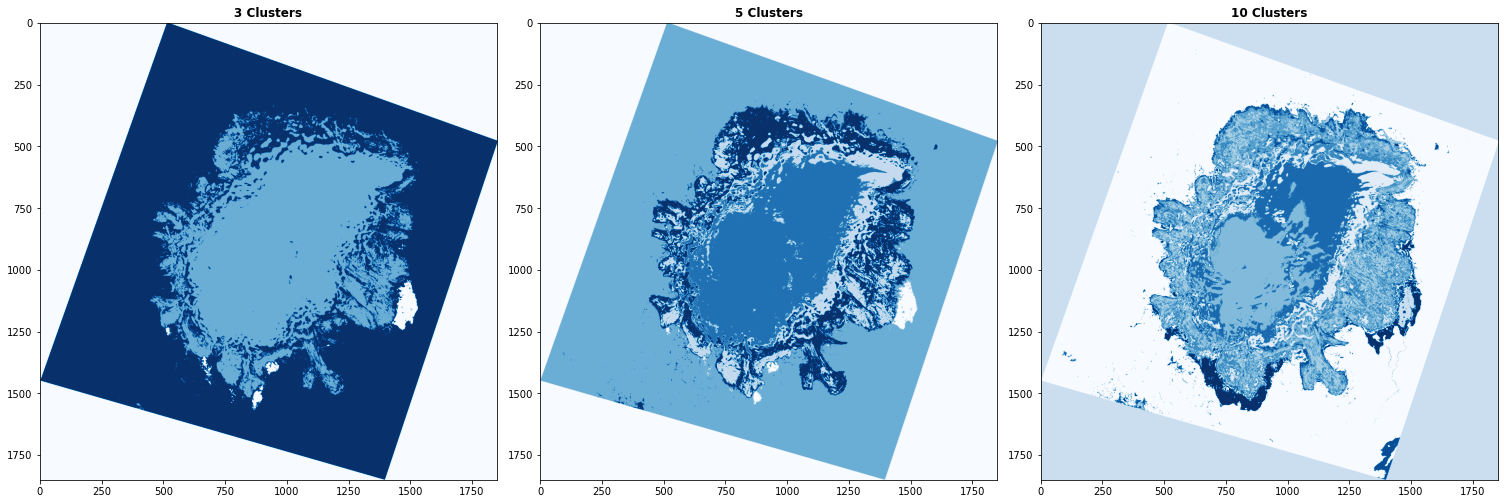

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))
plot.show(labels3_20, ax=ax1, cmap='Blues', title='3 Clusters') #red
plot.show(labels5_20, ax=ax2, cmap='Blues', title='5 Clusters') #green
plot.show(labels10_20, ax=ax3, cmap='Blues', title='10 Clusters') # blue
fig.tight_layout()

Above: the 2020 scene was classified using the k-means algorithm in Scikit-Learn. In both the 2016 and 2020 images, glacial extent was underrepresented using only 3 clusters, are well represented using 5 clusters, and overclassified using 10 clusters.

### Conclusion  
To compute area glacier area and outline the glacial extent, the k-means cluster plot was converted into a raster layer that contained a cluster number label for each segment of the image and was exported into ArcGIS Pro. Cluster groups were classified as glacier, snow, and everything else. Cluster group classifications that represented glacial extent were merged to create a polygon feature. 

##### Accuracy Assessment
To estimate the accuracy of the classifier, the results of the K-means clusters were visually inspected and compared to the RGB scene images. Quantitively describing the accuracy of the classifier via confusion matrix or extraordinarily difficult, as building a training dataset in Python was beyond my ability.  However, in addition to visual inspection, the glacial extent mapped in the project was compared to previous studies. 
<br> 
The following figure (made in ArcPro) shows the outline of the glacier polygons created from the k-means clusters and subsequent merging. The blue extent refers to the 2016 glacial margin, while the pink represents the 2020 glacial margin. Note, in the 2016 extent, there is a speckling of extraneous polygons that were misclassified as glacier, when they should have been associated with snow cover classes. The areas presented in Table 1 are of the large central polygons. 

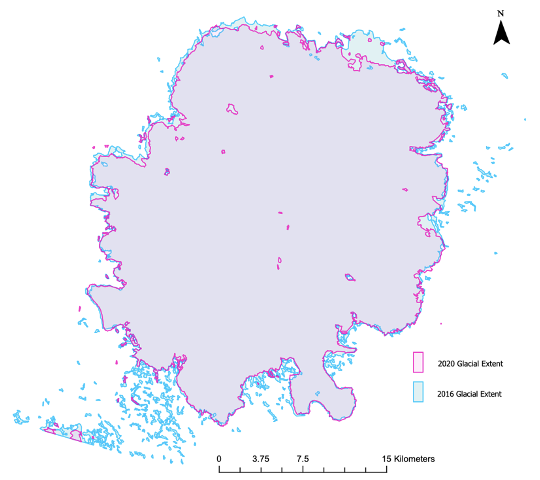  

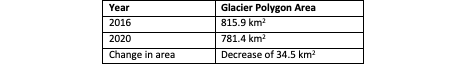

In 2002, Hofsjökull’s area was measured at 890 km2, suggesting that the measurement produced in the project using the k-means classifier was not entirely unreasonable at 815.9 km2 in 2016 (Sigurðsson, et. al, 2002) However, it is likely that the area values calculated here are underestimates of the true area of the glacier. 
<br>
<br>
The project has been optimistically successful. While the k-means clustering classification algorithm is not the most sophisticated and customizable classifier, it certainly produces a reasonable first pass. Future work could include building a training dataset with ground truth points to calculate error and confusion matrices that will better support the final classification. Additionally, incorporating elevation data could address area underestimates along the margins of the glacier where there are steeper elevation changes.


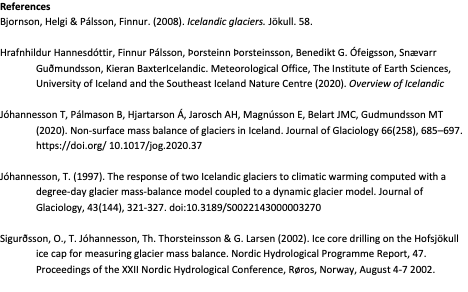